# <center> NANOGrav Pulsar Signal Simulator</center> #
## <center> IPTA 2017 Meeting: Sevres, France </center> ##
## <center> Jeffrey S. Hazboun, UTRGV </center> ##

<img src="./Fresnel.png" style="width: 300px;"/>

### <center> Including: JSH, Michael Lam, Nathan Garver-Daniels, Paul Brooks, Paul Baker, Pete Gentile, Jing Luo, Megan De Cesar, Jim Cordes, Joe Lazio, _Amelia Henkel (REU)_ , _Cassidy Wagner (REU)_ </center> ###

*If I forgot your name, show up to the telecons more often. 

## <center> Why a pulsar signal simulator? </center> ##

<img src="./FPS3_ShiDai.pdf" style="width: 500px;"/>
<img src="./PSIM.jpeg" style="width: 500px;"/>

1. Definitely not the first ones to think of this...
<img src="./wheel.jpg" style="width: 500px;"/>
2. Strength in multiple approaches and platforms.

## Simulator Summary ##

1. Simulate Pulsar Signals (NANOGrav Effort: Since Jan 2017)
    * ISM (IISM) has been the priority.
    * Timing is the next process on the list. (PINT)
    * Optimistic view is for use in a full simulation. (more hands on deck)
2. Teach people (students) about pulsar signals.
    * "Explore Mode"
    * Show students Baseband data!
    * Outreach
3. Many other use ideas:
    * Mock Data Challenge?
    * Testing search pipelines.
    * FRBs.
    * Highly relativistic binary timing models. 
    * Testing Telescope use for pulsars.

 ## Design ##
 1. Designed for __YOU__ to use it!! It's the skeleton for what you need. 
 <img src="./centaur-skeleton.jpg" style="width: 300px;"/>
 2. Python Based (Python 3, with backwards compatibility).
     * But really Python 2? Get over it they're just parenthesis.
 3. Git version control. 
     * Code is on GitHub. https://github.com/PsrSigSim
     * Example notebooks on GitHub.
     * Well documented. 
     * Unit tests with Version 1.0 release.
 4. Modular design. 
     * Multiple models for the different processes.
     * Allow for user to add their "tweak" at any point in the simulation.
 5. PSRFITS or Python Array output
 6. Optimized simulation mode
     * Take `.par` or other input files (`.src`).
     * FFTW, (PyCUDA, in the future..)
 7. Easily connects to the NANOGrav API for data
     * IPTA API ? 

(Which will be brought to us, from on high, by the mythical IPTA Post Doc.)
<img src="./riding_unicorn.jpg" style="width: 400px;" />

<img src="./Architecture.pdf" style="width: 700px;" />
<img src="./Architecture_Meta.pdf" style="width: 700px;" />

In [1]:
#Import the usual suspects.
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
from matplotlib.pyplot import *
%matplotlib inline

# Load the Simulator (If you work on it then you can help me name it!!)
# No Steve, it will not be Star Trek themed!
import VersionZeroPointZero as PSS

In [2]:
# Some helpful redefinitions for Matplotlib
rcParams['figure.figsize'] = (6.0,4.0)
rcParams.update({'font.size': 14})
Cmap = cm.afmhot 
Cmap.set_bad(color='k',alpha=1.0) #PSRCHIVE Colormap, care of Michael Lam

In [3]:
# I'll put this little gem into the simulator next later. 
def ProfilePlot(array, step=1, N=10,Title='Profile by Frequency Channel'):
    try:
        array_len = len(N)
        jj = 0
        for ii, jj in enumerate(N):
            plot(array[jj,:]+ii*(step),c='k')
        n=len(N)
    except:
        Freq_channels = len(array[:,0])
        Freq_step = int(Freq_channels//N)
        for ii in range(N):
            plot(array[ii*Freq_step,:]+ii*(step),c='k')
        n=N
    title(Title)
    xlabel('Phase')
    ylabel('Frequency Channel')
    xticks([])
    yticks([])
    xlim(0,len(array[0,:]))
    ylim(0,n*step+0.1)
    show()

# Okay, start paying attention again. 

In [4]:
#Simple
S = PSS.Signal()
P = PSS.Pulsar(S)

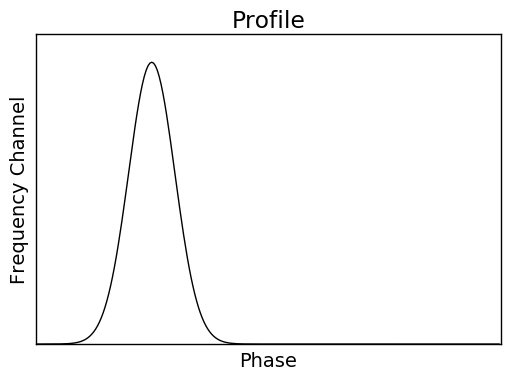

In [5]:
ProfilePlot(P.profile,N=1,Title='Profile')

In [6]:
P.make_pulses()

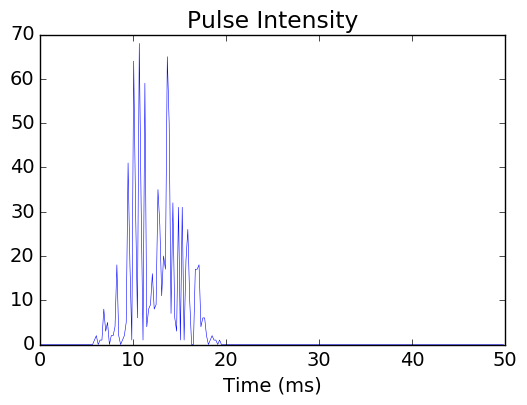

In [7]:
S.pulse_plot()

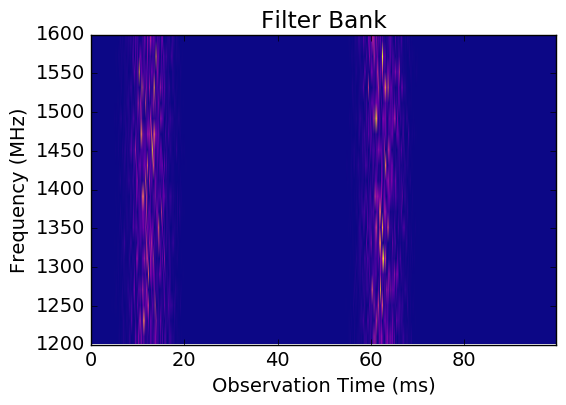

In [8]:
S.filter_bank(N_pulses=2)

In [9]:
ism = PSS.ISM(S)

In [10]:
ism.disperse()

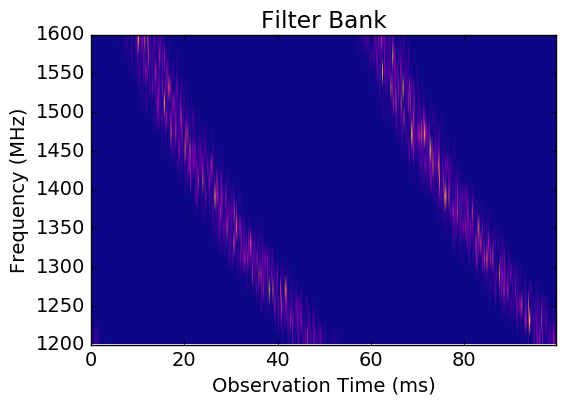

In [11]:
S.filter_bank(N_pulses = 2)

In [12]:
del S,P,ism

Sets our one hundred thousand time bin array to the GUPPI sample rate. GUPPI Sample rate = 20.48 microseconds

In [7]:
sample_size = 20.48e-3
N_Time_Bins = 100000 #One hundred Thousand
Total_time = round(N_Time_Bins*sample_size)
subband =1.5625 
BW=200
N_freq = BW/subband
print('Total_time (ms)',Total_time)
print('N_freq',N_freq)
print('Number of pulses = ',round(Total_time/8.3))

Total_time (ms) 2048
N_freq 128.0
Number of pulses =  247


In [14]:
S1= PSS.Signal(f0=1400, bw=200, Nf=N_freq, Nt=N_Time_Bins)

In [15]:
P1= PSS.Pulsar(S1,period=8.3)

In [16]:
S1.MetaData.__dict__

{'Nf': 128,
 'Nt': 100000,
 'SignalType': 'intensity',
 'TotTime': 200,
 'bw': 200,
 'data_type': 'uint8',
 'f0': 1400,
 'gamma_draw_max': 255,
 'mode': 'explore'}

In [17]:
#Arrays that define gaussian components of average profiles
peak = np.random.randn(S1.Nf*3)*0.03 + 0.2
width = abs(np.random.randn(S1.Nf*3)*0.002 +0.012)
amp = np.random.randn(S1.Nf*3)**2
peak.resize(S1.Nf,3)
width.resize(S1.Nf,3)
amp.resize(S1.Nf,3)
peak

array([[ 0.21092203,  0.20499982,  0.17108189],
       [ 0.17608915,  0.22441001,  0.21849022],
       [ 0.16991194,  0.15944033,  0.15271946],
       [ 0.23548403,  0.20905574,  0.16027885],
       [ 0.16585935,  0.24226264,  0.19995912],
       [ 0.18296601,  0.18917081,  0.20223865],
       [ 0.23154399,  0.21121027,  0.24134366],
       [ 0.23291105,  0.21426508,  0.18142922],
       [ 0.22523576,  0.18323804,  0.15674864],
       [ 0.1947075 ,  0.21724114,  0.18478461],
       [ 0.20072191,  0.21903835,  0.23177783],
       [ 0.21748999,  0.14341004,  0.22174172],
       [ 0.19296761,  0.20075766,  0.23304075],
       [ 0.22272146,  0.19421424,  0.24997476],
       [ 0.17575149,  0.22284042,  0.18186629],
       [ 0.24383617,  0.17319843,  0.19441739],
       [ 0.19213981,  0.20120772,  0.25036656],
       [ 0.22858345,  0.2403307 ,  0.25480336],
       [ 0.13648009,  0.19569039,  0.15602302],
       [ 0.21748533,  0.18618279,  0.27171433],
       [ 0.23920974,  0.14926135,  0.205

In [18]:
P1.gauss_template(peak=peak,width=width,amp=amp)

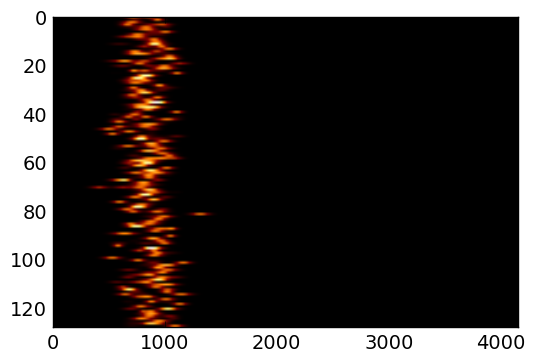

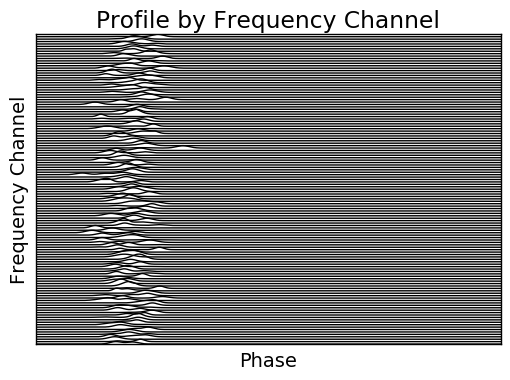

In [19]:
imshow(P1.profile,aspect='auto',cmap=Cmap)
show()
ProfilePlot(P1.profile,1,N=S1.Nf)

## <center> Average Profile </center>

In [ ]:
plot(np.sum(P1.profile,axis=0),c='k')
xticks([])
yticks([])
xlabel('Pulse Phase')
show()

In [ ]:
P1.make_pulses()

In [ ]:
S1.filter_bank()

In [ ]:
S1.MetaData.__dict__.keys()

In [ ]:
del S1, P1

In [ ]:
S2=PSS.Signal(f0=1400,bw=200,Nf=N_freq,Nt=N_Time_Bins)
P2=PSS.Pulsar(S2,period=8.3)
DM1 = 400 #Here we change the DM to 

In [ ]:
P2.gauss_template()

#### Convolve our Filterbank Signal with a top hat to mimic dispersion broadening  (Cassidy Wagner)

In [ ]:
for ii,freq in enumerate(S2.freq_Array):
    nbins = int(PSS.utils.top_hat_width(S2.freqBinSize,freq,DM1)//S2.TimeBinSize)
    P2.profile[ii,:] = sp.signal.convolve(P2.profile[ii,:], sp.signal.boxcar(nbins)/nbins, mode='same',method='fft')

In [ ]:
ProfilePlot(P2.profile,N=30,step=0.3)

In [ ]:
del S2,P2

In [20]:
S3=PSS.Signal(f0=1400,bw=200,Nt=N_Time_Bins,SignalType='voltage')
P3=PSS.Pulsar(S3,period=8.3)
P3.gauss_template([0.15,0.22],[.01,.02],[.01,.02])

In [21]:
P3.make_pulses()

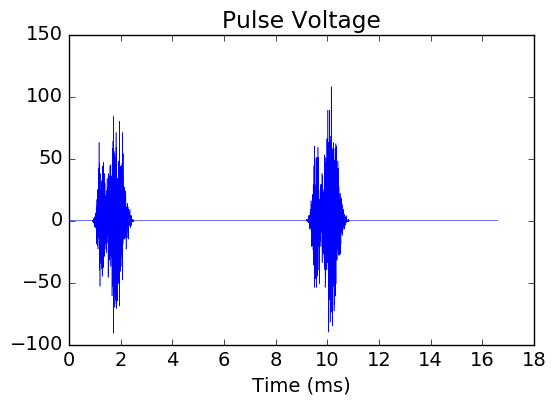

In [22]:
S3.pulse_plot(N_pulses=2)

## <center> Dispersed Baseband Signal (Amelia Henkel)  </center>
<img src="./DispersedPulses.png" style="width: 400px;" />

<img src="./Telescope_Raw.png" style="width: 600px;" />
<img src="./Folded.png" style="width: 600px;" />

In [ ]:
del S3,P3

In [23]:
S4 = PSS.Signal(f0=324, bw=6, Nf=250, Nt=12000,\
                TotTime = 1200, SignalType='intensity', data_type='int8')
P4 = PSS.Pulsar(S4, period=20)
dims = 200
DM = 22
Range = [0, S4.Nf//2, S4.Nf-1]
Phase_Screen = PSS.phase_screen(S4, scint_param_model='Bhat',DM=DM, Nx = 4*dims, Ny = dims, Number_r_F=1/128.)

Central Frequency decorrelation Bandwidth =  0.042  MHz


In [24]:
Gain1 = PSS.images(Phase_Screen,S4,mode='explore')

## References

Cordes et al.(1986); Coles et al. (1987); Foster & Cordes (1990); Hu et al. (1991) and Coles et al. (2010)

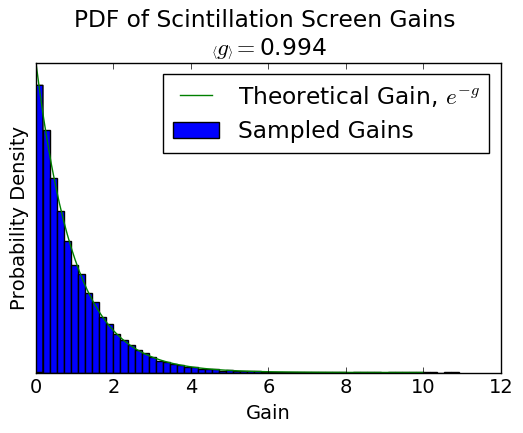

In [25]:
Gain1.gain_pdf()

# Scattering Realization

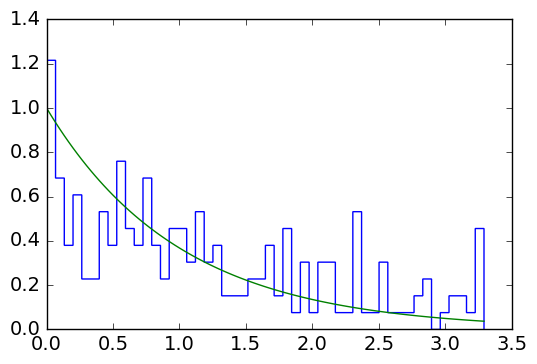

In [26]:
finite_sample = Gain1.gain[3,:200,100]
t=np.linspace(0,finite_sample.max(),100)
hist(finite_sample,bins=50,histtype='step',normed=True)
plot(t,np.exp(-t))
show()

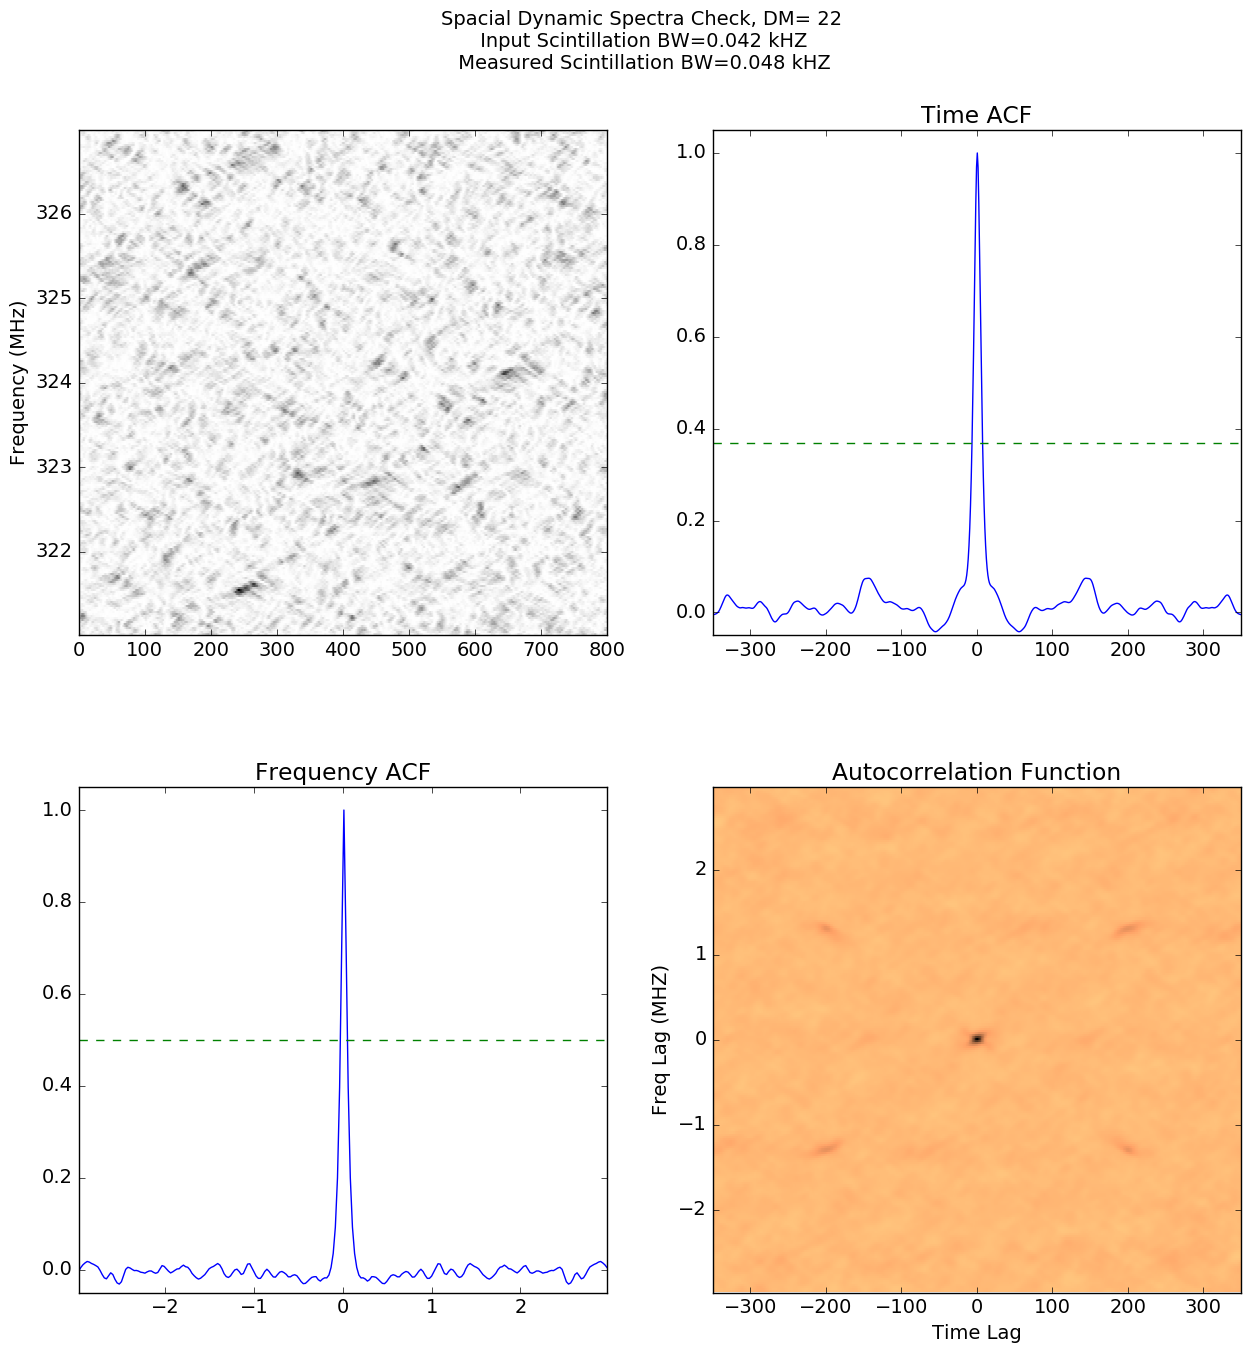

In [27]:
Gain1.dynamic_spectrum(S4)

In [4]:
del S4,P4, Phase_Screen, Gain1

NameError: name 'S4' is not defined

In [44]:
J1713_profiles = np.load('J1713+0747_pulses.npy')
#J2145_profiles = np.load('J2145-0750_pulses.npy')
J1713_profiles /= J1713_profiles.max()
#J2145_profiles /= J2145_profiles.max()

In [45]:
S5= PSS.Signal(f0=820,bw=200,Nf=len(J1713_profiles[:,0]),Nt=N_Time_Bins,TotTime=Total_time,mode='simulate')
P5= PSS.Pulsar(S5,period=(1/218.8)*1e3)

In [46]:
P5.user_template(J1713_profiles)

User supplied template has been downsampled.
Input array length=  2048 . Pulse template length=  223 .


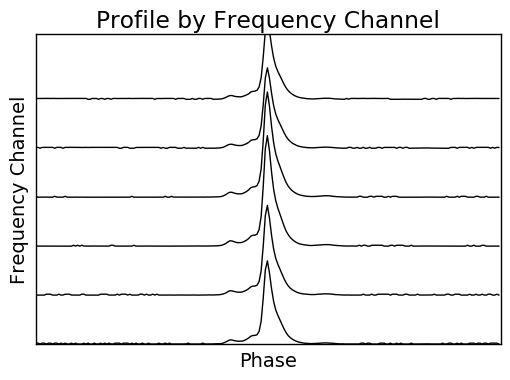

In [47]:
ProfilePlot(P5.profile,step=0.3, N=[20,45,70,90,110,111])

In [48]:
ISM5 = PSS.ISM(S5,mode='simulate')
ISM5.DM = 15.990354 # From J1713+0747 .par file. 
ISM5.finalize_ism()

In [49]:
Scint5 = PSS.scintillate(S5,to_use_NG_pulsar=True,\
                         pulsar='J1713+0747',telescope='GBT',freq_band=820)

Central Frequency decorrelation Bandwidth =  1.48  MHz


In [50]:
Scint6 = PSS.scintillate(S5,scint_timescale=0.1,scint_bw=1.48)

Central Frequency decorrelation Bandwidth =  1.48  MHz


In [51]:
Simul5 = PSS.Simulation(S5,P5,ISM5,Scint6)

In [52]:
Sim1a = Simul5.simulate()
#This will all be command line accessible...

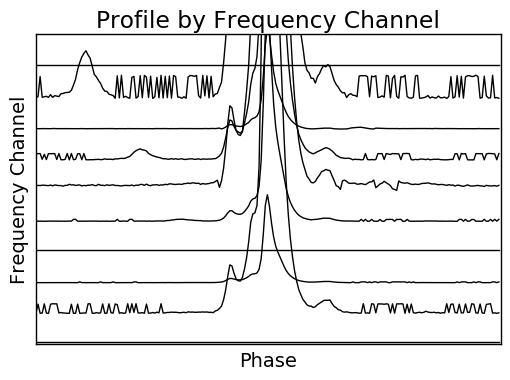

In [53]:
ProfilePlot(P5.profile)

In [ ]:
#ProfilePlot(P5.profile*Scint5.gain[:,5,np.newaxis],step=0.3, N=[20,45,70,110,111])

In [54]:
def dynamic_spectrum(signal_object,integration_length=1): #integration length in seconds
    N_integrations = int(signal_object.TotTime*1e-3//integration_length)
    print('N_integrations',N_integrations)
    n_bins_integrate = int(integration_length*1e3 // signal_object.TimeBinSize)
    print('n_bins_integrate',n_bins_integrate)
    dynamic_spectra = np.zeros((signal_object.Nf,N_integrations))
    for ii in range(N_integrations):
        dynamic_spectra[:,ii] = np.sum(signal_object.signal[:,ii*n_bins_integrate:(ii+1)*n_bins_integrate],axis=1)
    return dynamic_spectra

In [60]:
DS5 = dynamic_spectrum(S5,integration_length=0.19)

N_integrations 10
n_bins_integrate 9277


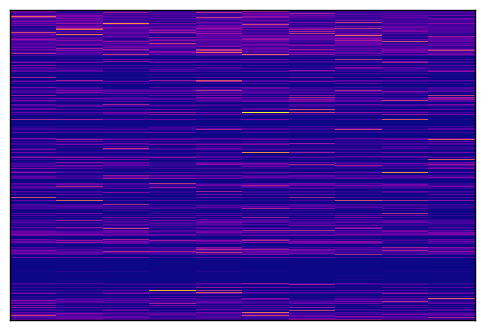

193.0

In [61]:
imshow(DS5,origin='left',aspect='auto',cmap='plasma',interpolation='none')
xticks([])
yticks([])
show()
np.unravel_index(np.argmax(DS5), DS5.shape)
np.amax(DS5)

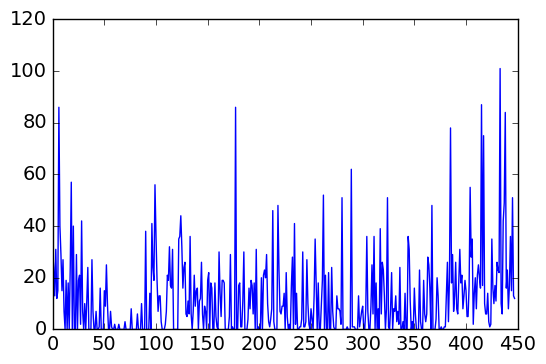

In [57]:
plot(DS5[:,1])
show()

11.8601918199


(207, 329)

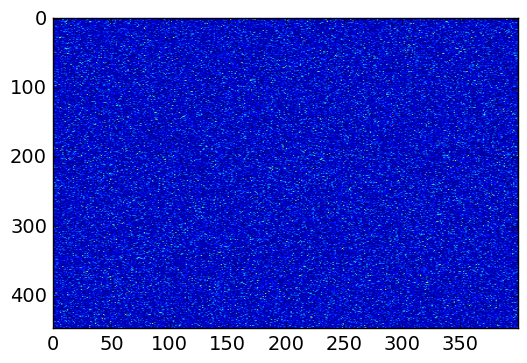

In [58]:
imshow(Scint6.gain,aspect='auto')
print(Scint6.gain.max())
np.unravel_index(np.argmax(Scint6.gain),Scint6.gain.shape)

In [43]:
del S5,P5,ISM5, Scint6,Simul5

## Remember, this simulator is meant to be flexible... FRBs !!

<img src="./dispersed_burst.png" style="width: 500px;" />

## Looking Forward (In no particular order)
1. Visualization (`Bokeh`, thanks to Aditya)
2. More advanced scattering simulations
3. Timing model
4. Command Line access
5. Python Class Factories
6. More Amplitude Modulated Noise Distribution Choices
7. Richard Prestage's (GBT)  phased array simulation

# <center> Please Join Us! </center>
## <center> (IPTA Simulator ?) </center>

Note to beat a dead horse, but...<img src="./Horse_and_Man.jpg" style="width: 220px;" />

 ### The simulator development is still plastic. Many of you have strong opinions about pulsar software. I would really like to here what you have to say _before_ the simulator has been fully... _fleshed out_.

In [ ]:
#Unless you want to tell me to code it in c...

1. Submit an enhancement request on our GitHub page.
2. Send me an email with any questions, advice, dreams of a perfect simulator.
3. Please consider sharing any pulsar related python scripts that you might want others to use, or that you might want implemented in the

## <center> Version 1.0 release in Fall 2017 !!</center>